In [1]:
import pandas as pd
from sklearn.datasets import load_boston

# импортируем датасет с ценами квартир в Бостоне
boston = load_boston()
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
df['target'] = boston['target']

df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


# Cтандартизация


In [3]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


# определим экземпляр класса StandardScaler
sc = StandardScaler()
df_scalar = sc.fit_transform(df.iloc[:, :-1])
# так как после StandardScaler получаем данные типа numpy.ndarray
# то преобразуем в DataFrame
df_scalar = pd.DataFrame(data=df_scalar, columns=df.columns[:-1])
df_scalar[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


###  Посмотрим на изменение одного из признаков RM

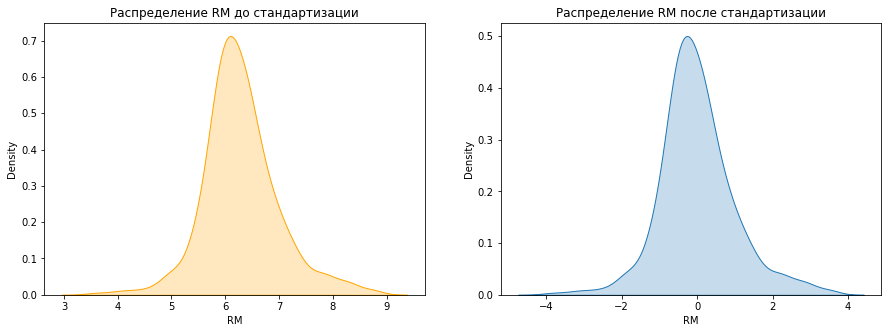

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

sns.kdeplot(data=df, x='RM', fill=True, color='orange', ax=axes[0])
axes[0].set_title('Распределение RM до стандартизации')
sns.kdeplot(data=df_scalar, x='RM', fill=True, ax=axes[1])
axes[1].set_title('Распределение RM после стандартизации');

 Можно отметить, что среднее значение сменилось с почти 6 на 0.

# Нормирование

In [11]:
from sklearn.preprocessing import MinMaxScaler


# определим экземпляр класса MinMaxScaler
mm = MinMaxScaler()
df_scalar = mm.fit_transform(df.iloc[:, :-1])
# так как после MinMaxScaler получаем данные типа numpy.ndarray
# то преобразуем в DataFrame
df_scalar = pd.DataFrame(data=df_scalar, columns=df.columns[:-1])
df_scalar[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


### Посмотрим на изменение одного из признаков AGE

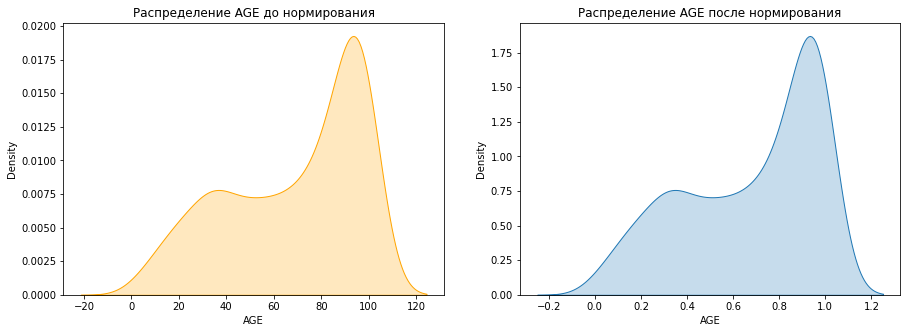

In [12]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

sns.kdeplot(data=df, x='AGE', fill=True, color='orange', ax=axes[0])
axes[0].set_title('Распределение AGE до нормирования')
sns.kdeplot(data=df_scalar, x='AGE', fill=True, ax=axes[1])
axes[1].set_title('Распределение AGE после нормирования');

Можно отметить, что наши значения теперь распределились в промежутке от 0 до 1.

# Обработка признаков
## Кодирование категориальных признаков

#### 1) бинаризация (one-hot-кодирование)

In [13]:
import numpy as np


# создадим список с цветом стен объекта
feature_cat = ['white', 'grey', 'lightblue']
# создадим новый признак в датасете со случайными значениями из feature_cat
df['feature_cat'] = [np.random.choice(feature_cat) for _ in range(len(df))]
df[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,feature_cat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,lightblue
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,grey
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,white
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,grey
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,grey


In [14]:
pd.get_dummies(data=df, prefix='feature_', drop_first=True)[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,feature__lightblue,feature__white
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0,0


#### 2) кодирование числами (label encoder-кодирование)

In [15]:
df['feature_cat'] = df['feature_cat'].astype('category')
df['feature_cat'].cat.codes

0      1
1      0
2      2
3      0
4      0
      ..
501    2
502    2
503    1
504    0
505    2
Length: 506, dtype: int8

In [16]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,feature_cat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,lightblue
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,grey
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,white
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,grey
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,grey


### Разбиение данных в регрессии

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
y = boston['target']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

print(f'Размер исходного датасета: {pd.concat([X, pd.Series(y)], axis=1).shape}')
print(f'Размер тренировочного датасета: {X_train.shape}')
print(f'Размер тестового датасета: {X_test.shape}')

Размер исходного датасета: (506, 14)
Размер тренировочного датасета: (404, 13)
Размер тестового датасета: (102, 13)


### Разбиение данных в классификации

In [19]:
from sklearn.datasets import load_iris

# импортируем датасет с ирисами
iris = load_iris()

X = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)

print(f'Размер исходного датасета: {pd.concat([X, pd.Series(y)], axis=1).shape}')
print(f'Размер тренировочного датасета: {X_train.shape}')
print(f'Размер тестового датасета: {X_test.shape}')

Размер исходного датасета: (150, 5)
Размер тренировочного датасета: (120, 4)
Размер тестового датасета: (30, 4)


### Обработка признаков

В прошлом шаге мы уже с вами затрагивали тему обработки признаков: нормирования и стандартизация. Чтобы грамотно обработать ваши признаки и в дальнейшем использовать в обучении модели, необходимо такую работу производить грамотно, чтобы у вашего алгоритма не было "подсказок", из-за которых на новых данных он может дать плохой результат, даже если по всем вашим метрикам на тренировочном датасете все было в порядке.

Для этого мы должны по отдельности производить обработку числовых признаков для train и test:

In [20]:
# продолжим работу с датасетом ирисы
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)